<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/s2RNC_optimizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [ ]:
# datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1) / 255.0, x_test.reshape(-1, 28, 28, 1) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# modelo de RNC
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


In [ ]:
learning_rates = [0.1, 0.01, 0.001]
momenta = [0.0, 0.5, 0.9]

In [ ]:
loss_function = 'categorical_crossentropy'

In [ ]:
history_dict = {}
for lr in learning_rates:
    for momentum in momenta:
        model = create_model()
        optimizer = SGD(learning_rate=lr, momentum=momentum)
        model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
        print(f"Training with learning rate {lr} and momentum {momentum}")
        history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)
        key = f"LR={lr}, Momentum={momentum}"
        history_dict[key] = history

Training with learning rate 0.1 and momentum 0.0
Epoch 1/10
1875/1875 - 51s - loss: 0.1857 - accuracy: 0.9415 - val_loss: 0.0652 - val_accuracy: 0.9782 - 51s/epoch - 27ms/step
Epoch 2/10
1875/1875 - 47s - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.0369 - val_accuracy: 0.9883 - 47s/epoch - 25ms/step
Epoch 3/10
1875/1875 - 48s - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9881 - 48s/epoch - 25ms/step
Epoch 4/10
1875/1875 - 50s - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0319 - val_accuracy: 0.9907 - 50s/epoch - 27ms/step
Epoch 5/10
1875/1875 - 49s - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0338 - val_accuracy: 0.9884 - 49s/epoch - 26ms/step
Epoch 6/10
1875/1875 - 46s - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0316 - val_accuracy: 0.9913 - 46s/epoch - 25ms/step
Epoch 7/10
1875/1875 - 48s - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0309 - val_accuracy: 0.9905 - 48s/epoch - 25ms/step
Epoch 8/10
1875/1875 - 50s - loss: 0.0124 - accuracy: 0.9962 -

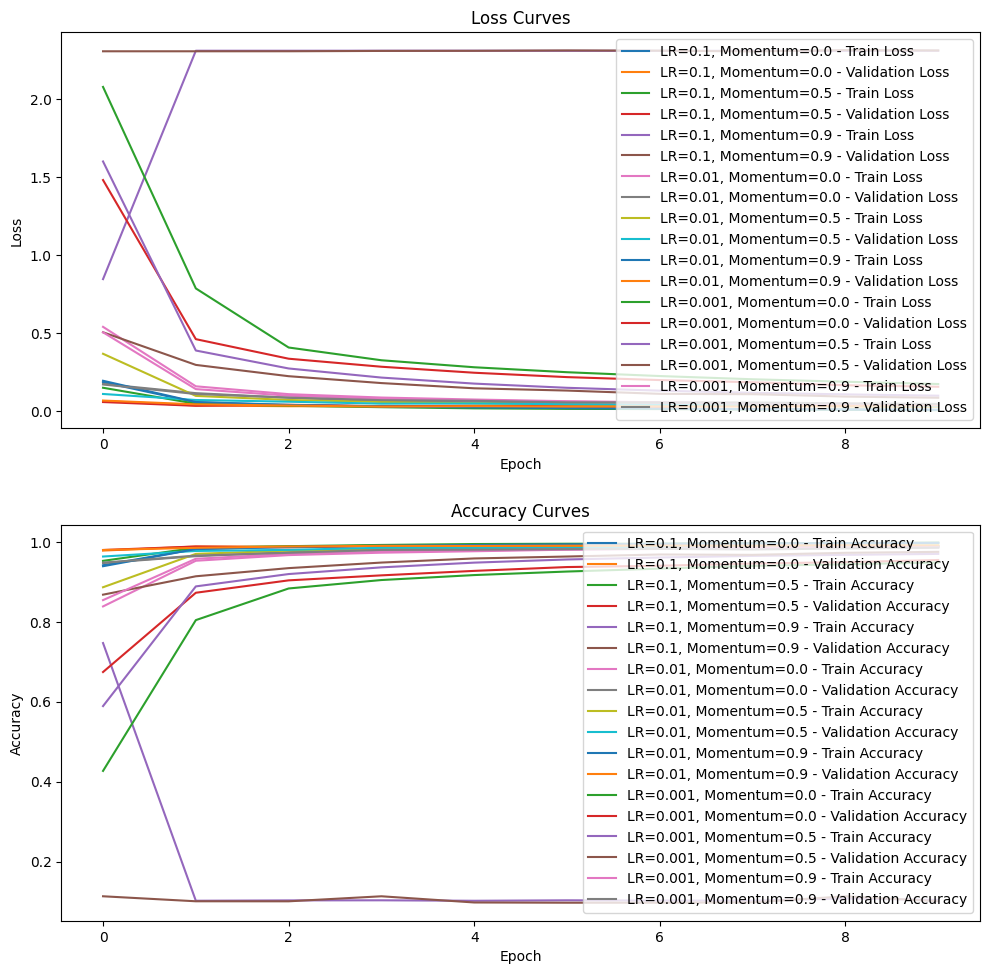

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
for key, history in history_dict.items():
    ax[0].plot(history.history['loss'], label=f'{key} - Train Loss')
    ax[0].plot(history.history['val_loss'], label=f'{key} - Validation Loss')
    ax[1].plot(history.history['accuracy'], label=f'{key} - Train Accuracy')
    ax[1].plot(history.history['val_accuracy'], label=f'{key} - Validation Accuracy')
ax[0].set_title('Loss Curves')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].set_title('Accuracy Curves')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()
plt.show()